In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import defaultdict
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

mpl.rcParams['figure.figsize'] = (6,6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

## v4 samples

In [27]:
config = {
    "base_dir":        "/storage/vbsjjlnu/VBSjjlnu_v7/",
    "plot_config":     "FullRun2_v7",
    "cut":             "res_sig",
    "model_version":   ["v4_d"],
    "samples_version": "v4"
}
import os
config_base_dir = os.path.join(config["base_dir"], config["plot_config"])

In [28]:
import os
import yaml
configs = {}

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])


for mv in config['model_version']:
    conf ={ 'model_version': mv,
              'model_dir': os.path.join(config_base_dir, config["cut"] , "models",  mv )
            }
    model_config_file = open(conf['model_dir'] + "/model_config.yml", "r")
    model_config = yaml.safe_load(model_config_file)
    for key in ["samples_version", "cols"]:
        conf[key] = model_config[key]
    configs[mv] = conf

In [29]:
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
import pickle
signal = pickle.load(open(os.path.join(samples_dir, "for_training/signal_balanced.pkl"),     "rb"))
bkg    = pickle.load(open(os.path.join(samples_dir, "for_training/background_balanced.pkl"), "rb"))

In [30]:
for model_version, config in configs.items():
    print("Loading model:", os.path.join(config['model_dir'], "model.h5"))
    model = tf.keras.models.load_model(os.path.join(config['model_dir'], "model.h5"))
    X_sig = signal[config["cols"]].values
    X_bkg = bkg[config["cols"]].values
    Y_sig = np.ones(len(X_sig))
    Y_bkg = np.zeros(len(X_bkg))
    W_sig = (signal["weight_norm"]).values
    W_bkg = (bkg["weight_norm"]).values
    Wnn_sig = (signal["weight"]).values
    Wnn_bkg = (bkg["weight"]).values

    X = np.vstack([X_sig, X_bkg])
    Y = np.hstack([Y_sig, Y_bkg])
    W = np.hstack([W_sig, W_bkg])
    Wnn = np.hstack([Wnn_sig, Wnn_bkg])

    from sklearn.preprocessing import StandardScaler
    #scaler = pickle.load(open(f"{model_dir}/scaler_model.pkl", "rb"))
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    bkg["y_"+model_version] = model.predict(scaler.transform(bkg[config["cols"]].values), batch_size=2048)
    signal["y_"+model_version] = model.predict(scaler.transform(signal[config["cols"]].values), batch_size=2048)
    

    tot_bkg = np.sum(bkg.weight)
    tot_signal = np.sum(signal.weight)

    TP = []
    FP = [] 
    
    print("doing ROC for ", model_version)
    for x in np.linspace(0.8, 1.,30):
        a = np.sum(bkg[bkg["y_"+model_version]> x]["weight"])
        FP.append(a/tot_bkg)
        b = np.sum(signal[signal["y_"+model_version]> x]["weight"])
        TP.append(b/tot_signal)
    
    rocs[model_version] = (TP, FP)
    
    

Loading model: /storage/vbsjjlnu/VBSjjlnu_v7/FullRun2_v7/res_sig/models/v4_d/model.h5
doing ROC for  v4_d


In [7]:
h_bkg, bins = np.histogram(bkg["y_"+model_version], bins=40, range=(0,1),weights=bkg.weight)
h_bkg_v4 = h_bkg/ np.sum(h_bkg)

h_sig, bins = np.histogram(signal["y_"+model_version], bins=40,range=(0,1), weights=signal.weight)
h_sig_v4 = h_sig/ np.sum(h_sig)

# V5 samples, training E

In [31]:
config = {
    "base_dir":        "/storage/vbsjjlnu/VBSjjlnu_v7/",
    "plot_config":     "FullRun2_v7",
    "cut":             "res_sig",
    "model_version":   ["v1_e"],#["v1_e","v2_e","v3_e", "v4_e", 'v5_e','v6_e','v7_e'] ,#'v8_e', 'v10_e','v11_e'],
    "samples_version": "v5"
}
import os
config_base_dir = os.path.join(config["base_dir"], config["plot_config"])

In [32]:
import os
import yaml
configs = {}

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])


for mv in config['model_version']:
    conf ={ 'model_version': mv,
              'model_dir': os.path.join(config_base_dir, config["cut"] , "models",  mv )
            }
    model_config_file = open(conf['model_dir'] + "/model_config.yml", "r")
    model_config = yaml.safe_load(model_config_file)
    for key in ["samples_version", "cols"]:
        conf[key] = model_config[key]
    configs[mv] = conf

In [33]:
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
import pickle
signal = pickle.load(open(os.path.join(samples_dir, "for_training/signal_balanced.pkl"),     "rb"))
bkg    = pickle.load(open(os.path.join(samples_dir, "for_training/background_balanced.pkl"), "rb"))

In [34]:
for model_version, config in configs.items():
    print("Loading model:", os.path.join(config['model_dir'], "model.h5"))
    model = tf.keras.models.load_model(os.path.join(config['model_dir'], "model.h5"))
    X_sig = signal[config["cols"]].values
    X_bkg = bkg[config["cols"]].values
    Y_sig = np.ones(len(X_sig))
    Y_bkg = np.zeros(len(X_bkg))
    W_sig = (signal["weight_norm"]).values
    W_bkg = (bkg["weight_norm"]).values
    Wnn_sig = (signal["weight"]).values
    Wnn_bkg = (bkg["weight"]).values

    X = np.vstack([X_sig, X_bkg])
    Y = np.hstack([Y_sig, Y_bkg])
    W = np.hstack([W_sig, W_bkg])
    Wnn = np.hstack([Wnn_sig, Wnn_bkg])

    from sklearn.preprocessing import StandardScaler
    #scaler = pickle.load(open(f"{model_dir}/scaler_model.pkl", "rb"))
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    bkg["y_"+model_version] = model.predict(scaler.transform(bkg[config["cols"]].values), batch_size=2048)
    signal["y_"+model_version] = model.predict(scaler.transform(signal[config["cols"]].values), batch_size=2048)
    

    tot_bkg = np.sum(bkg.weight)
    tot_signal = np.sum(signal.weight)

    TP = []
    FP = [] 
    
    print("doing ROC for ", model_version)
    for x in np.linspace(0.8, 1.,30):
        a = np.sum(bkg[bkg["y_"+model_version]> x]["weight"])
        FP.append(a/tot_bkg)
        b = np.sum(signal[signal["y_"+model_version]> x]["weight"])
        TP.append(b/tot_signal)
    
    rocs[model_version] = (TP, FP)
    
    

Loading model: /storage/vbsjjlnu/VBSjjlnu_v7/FullRun2_v7/res_sig/models/v1_e/model.h5
doing ROC for  v1_e


In [ ]:
#!pip install --user mplhep

In [9]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
# Overall - both left and right annotation

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

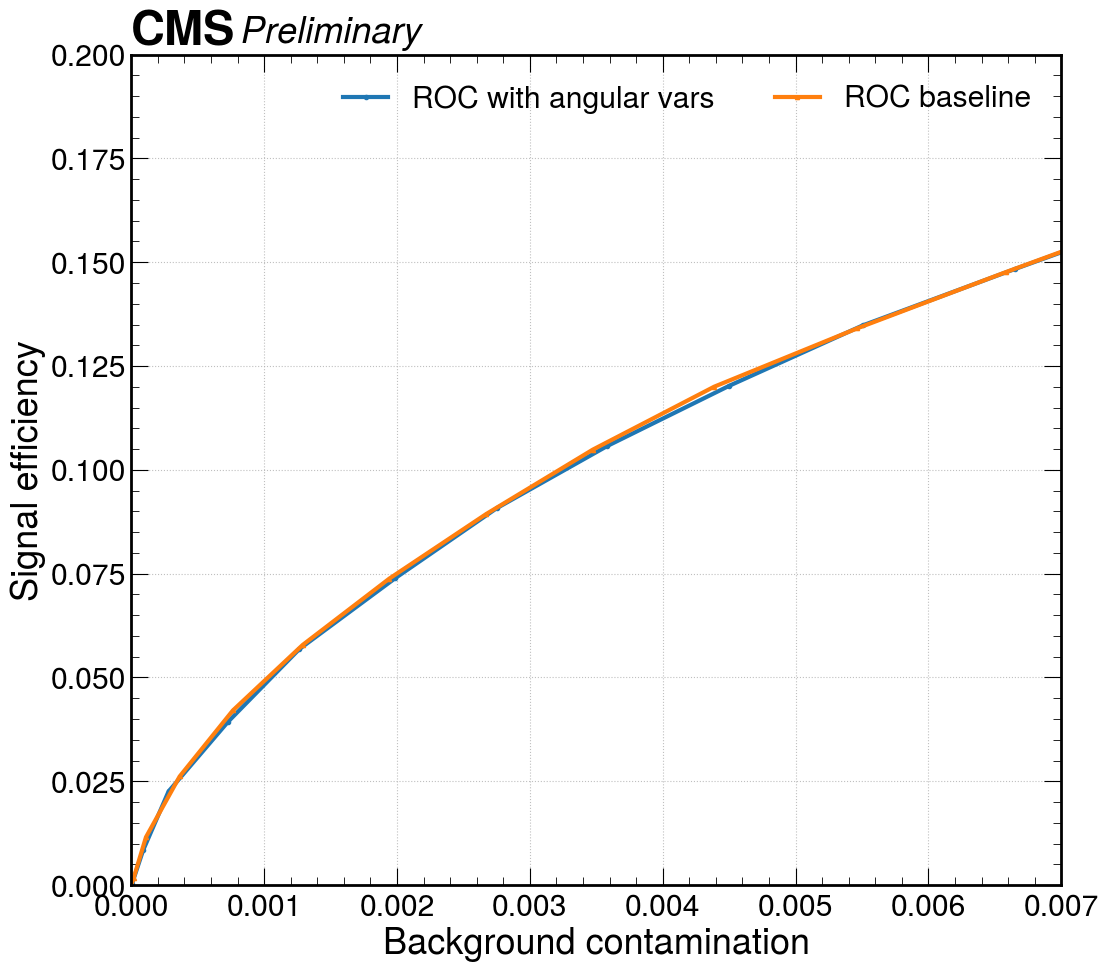

In [39]:
fig,  ax1 = plt.subplots(1,1, figsize=(12,11), dpi=100)

ax1.plot(rocs['v1_e'][1],rocs['v1_e'][0],'o-', linewidth=3,markersize=3, label="ROC with angular vars",)     
ax1.plot(rocs['v4_d'][1],rocs['v4_d'][0],'^-', linewidth=3,markersize=3, label="ROC baseline")

ax1.set_ylabel("Signal efficiency")
ax1.set_xlabel("Background contamination")
ax1.legend(ncol=2)
#ax1.set_title("ROC curve")
ax1.set_ylim([0,0.2])
ax1.set_xlim([0,0.007])
ax1.grid()
    
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

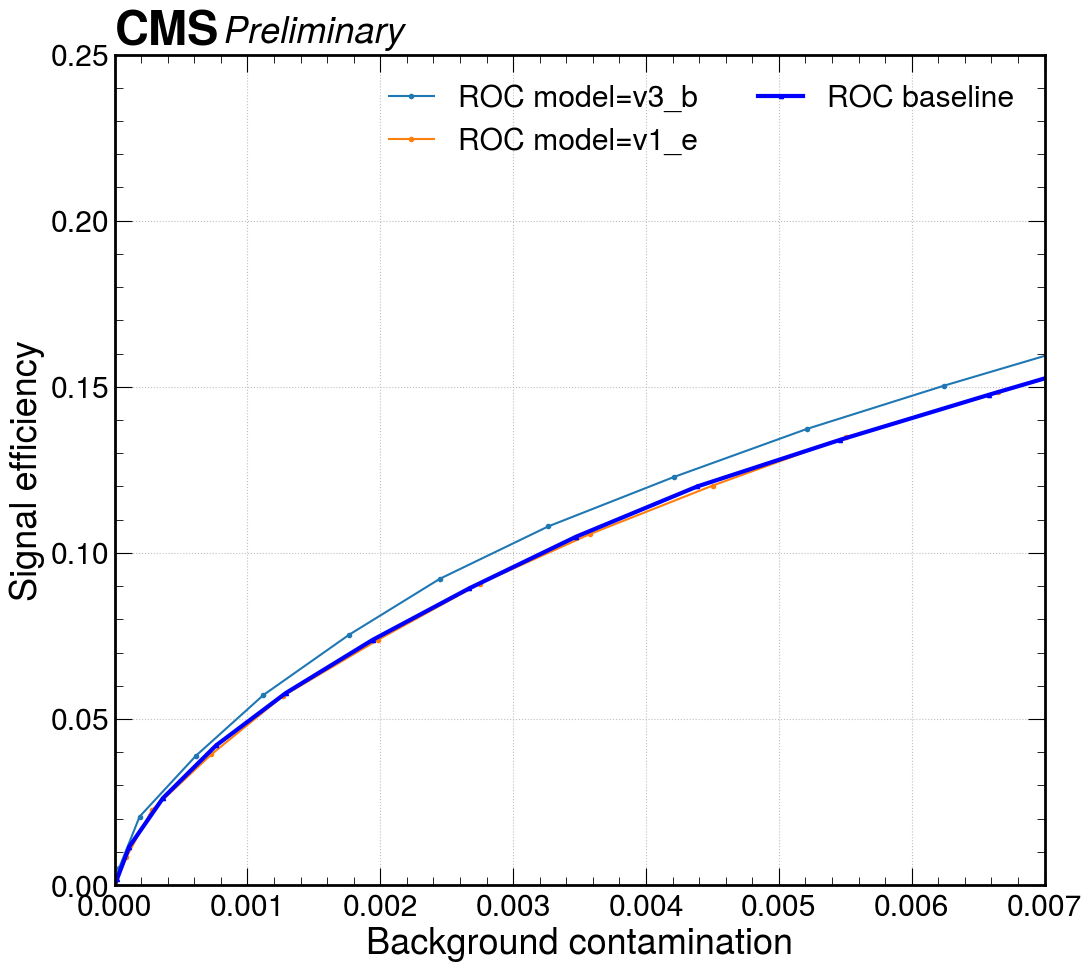

In [38]:
fig,  ax1 = plt.subplots(1,1, figsize=(12,11), dpi=100)

for model_version, (TP,FP) in rocs.items():
    if model_version != 'v4_d':
        ax1.plot(FP,TP,'.-', label="ROC model={}".format(model_version))
        
ax1.plot(rocs['v4_d'][1],rocs['v4_d'][0],'^-', linewidth=3,markersize=3, label="ROC baseline", color='blue')
ax1.set_ylabel("Signal efficiency")
ax1.set_xlabel("Background contamination")
ax1.legend(ncol=2)
#ax1.set_title("ROC curve")
ax1.set_ylim([0,0.25])
ax1.set_xlim([0,0.007])
ax1.grid()
    
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

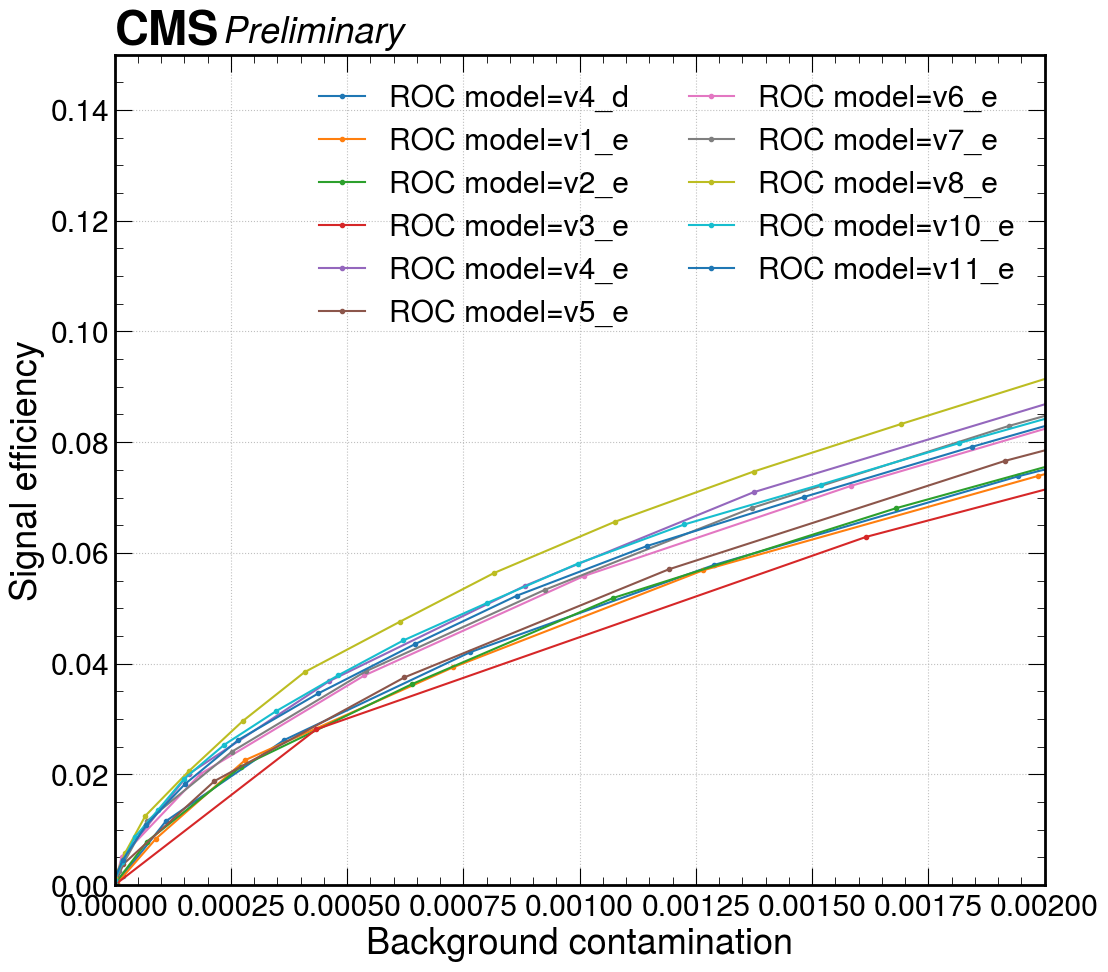

In [194]:
fig,  ax1 = plt.subplots(1,1, figsize=(12,11), dpi=100)

for model_version, (TP,FP) in rocs.items():
    ax1.plot(FP,TP,'.-', label="ROC model={}".format(model_version))
ax1.set_ylabel("Signal efficiency")
ax1.set_xlabel("Background contamination")
ax1.legend(ncol=2)
#ax1.set_title("ROC curve")
ax1.set_ylim([0,0.15])
ax1.set_xlim([0,0.002])
ax1.grid()
    
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

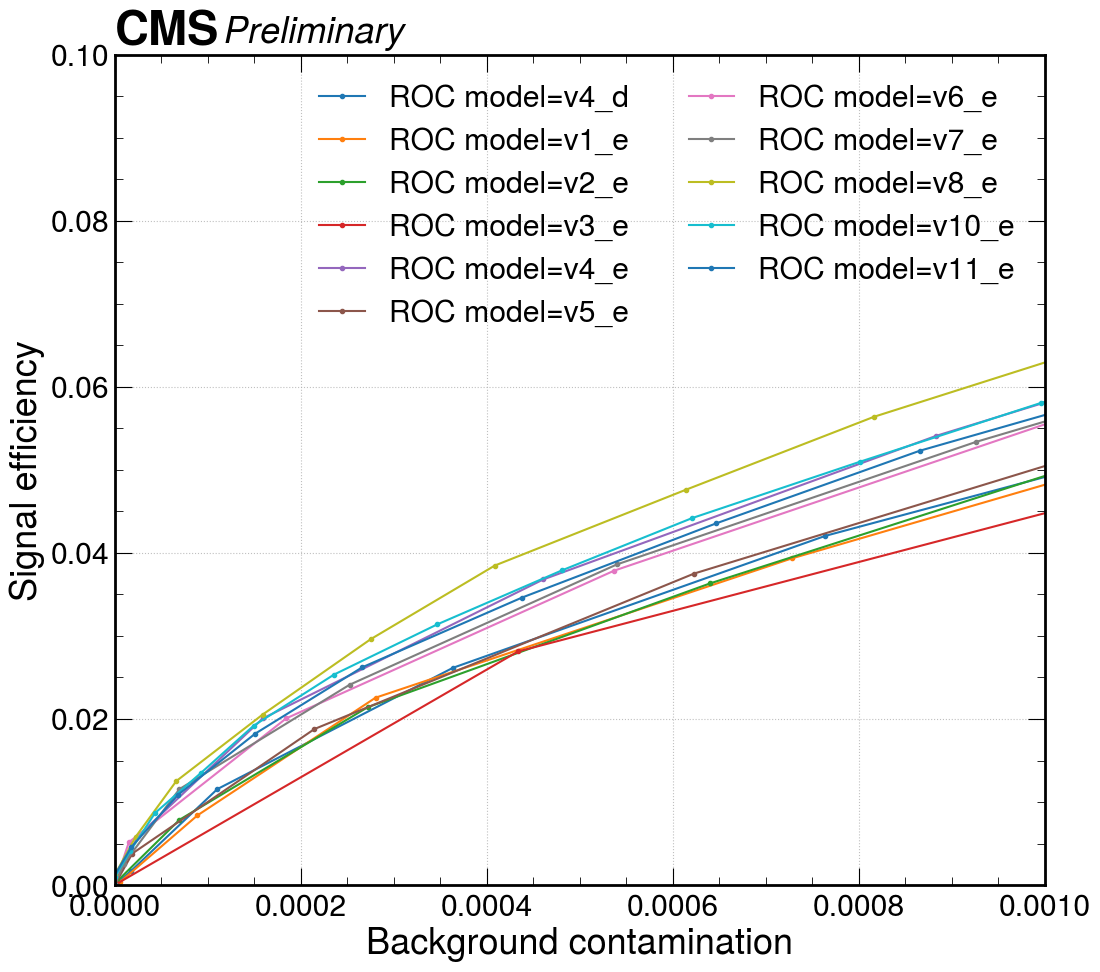

In [195]:
fig,  ax1 = plt.subplots(1,1, figsize=(12,11), dpi=100)

for model_version, (TP,FP) in rocs.items():
    ax1.plot(FP,TP,'.-', label="ROC model={}".format(model_version))
ax1.set_ylabel("Signal efficiency")
ax1.set_xlabel("Background contamination")
ax1.legend(ncol=2)
#ax1.set_title("ROC curve")
ax1.set_ylim([0,0.10])
ax1.set_xlim([0,0.001])
ax1.grid()
    
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

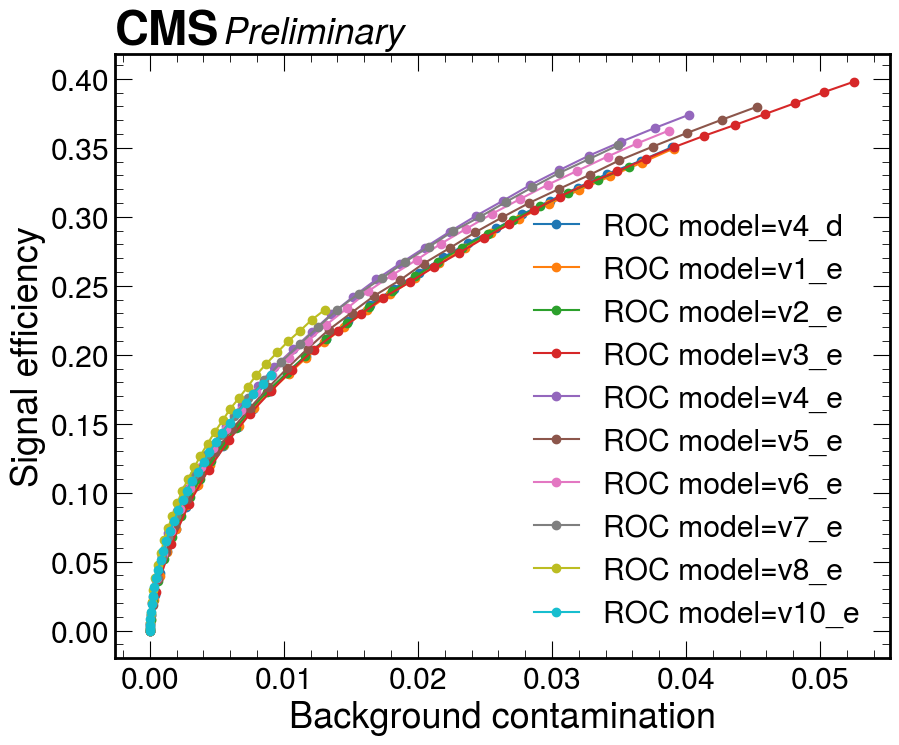

In [184]:
fig,  ax1 = plt.subplots(1,1, figsize=(10,8), dpi=100)

for model_version, (TP,FP) in rocs.items():
    ax1.plot(FP,TP,'o-', label="ROC model={}".format(model_version))
ax1.set_ylabel("Signal efficiency")
ax1.set_xlabel("Background contamination")
ax1.legend()
#ax1.set_title("ROC curve")
    
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

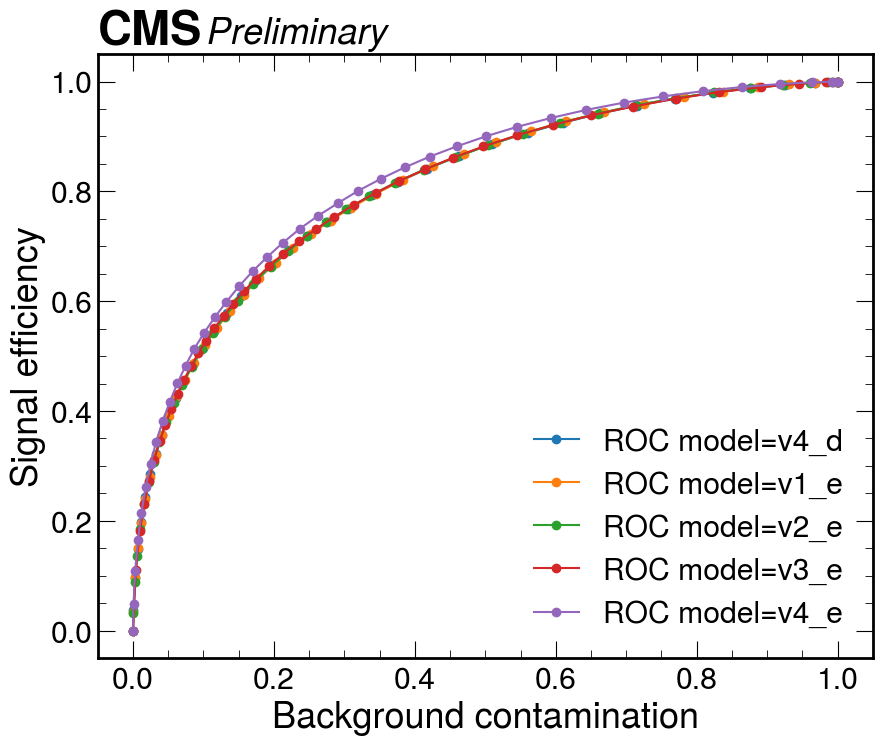

In [40]:
fig,  ax1 = plt.subplots(1,1, figsize=(10,8), dpi=100)

for model_version, (TP,FP) in rocs.items():
    ax1.plot(FP,TP,'o-', label="ROC model={}".format(model_version))
ax1.set_ylabel("Signal efficiency")
ax1.set_xlabel("Background contamination")
ax1.legend()
#ax1.set_title("ROC curve")
    
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))


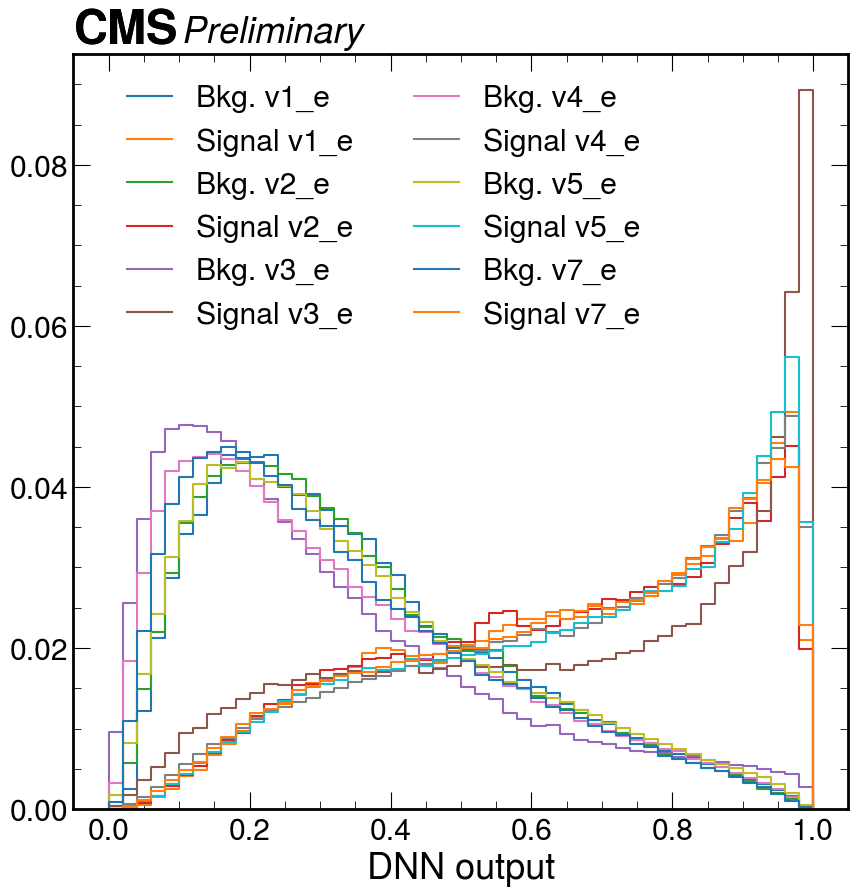

In [93]:
fig, ax1 = plt.subplots(figsize=(10,10), dpi=100)

for model_version, config in configs.items():
    h_bkg, bins = np.histogram(bkg["y_"+model_version], bins=50, range=(0,1), weights=bkg.weight)
    h_bkg = h_bkg/ np.sum(h_bkg)

    h_sig, bins = np.histogram(signal["y_"+model_version], bins=50, range=(0,1), weights=signal.weight)
    h_sig = h_sig/ np.sum(h_sig)
    

    a = hep.histplot(h_bkg, bins, ax=ax1, label="Bkg. "+model_version)
    hep.histplot(h_sig, bins, ax=ax1, label="Signal "+model_version)

plt.xlabel('DNN output')

plt.legend(loc='upper center', bbox_to_anchor=(0.4,1), ncol=2)
#hep.cms.label()
# Just experiment label and <text> such as 'Preliminary' or 'Simulation'
hep.cms.text("Preliminary ",loc=0)
print(hep.cms.text())
#plt.yscale("log")
plt.ylim([0,0.1])

#plt.savefig(model_dir + "/train_test_distribution.png")

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))


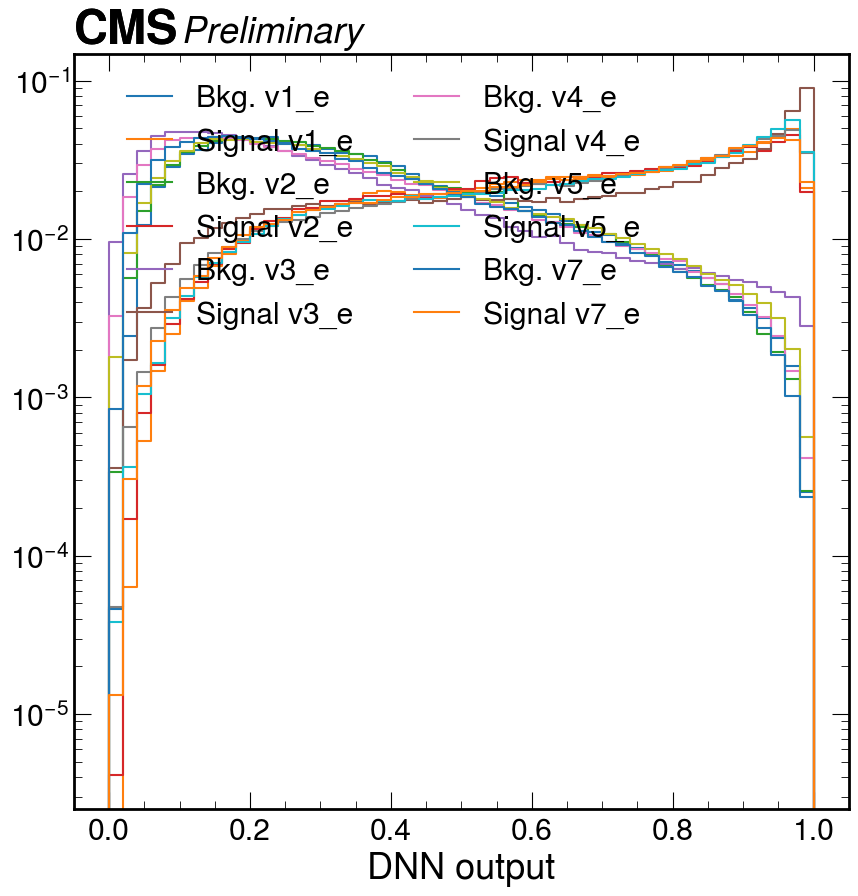

In [99]:
fig, ax1 = plt.subplots(figsize=(10,10), dpi=100)

for model_version, config in configs.items():
    h_bkg, bins = np.histogram(bkg["y_"+model_version], bins=50, range=(0,1), weights=bkg.weight)
    h_bkg = h_bkg/ np.sum(h_bkg)

    h_sig, bins = np.histogram(signal["y_"+model_version], bins=50, range=(0,1), weights=signal.weight)
    h_sig = h_sig/ np.sum(h_sig)
    

    a = hep.histplot(h_bkg, bins, ax=ax1, label="Bkg. "+model_version)
    hep.histplot(h_sig, bins, ax=ax1, label="Signal "+model_version)

plt.xlabel('DNN output')

plt.legend(loc='upper center', bbox_to_anchor=(0.4,1), ncol=2)
#hep.cms.label()
# Just experiment label and <text> such as 'Preliminary' or 'Simulation'
hep.cms.text("Preliminary ",loc=0)
print(hep.cms.text())
plt.yscale("log")
#plt.ylim([1e-2,0.7])

#plt.savefig(model_dir + "/train_test_distribution.png")